# Residual stress prediction

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel("Book1.xlsx")

In [3]:
data

,Scan,Peak Temperature (℃),Peak Temperature reached Time (min),Scanning Distance (mm),Equivalent stress (MPa)
0,ru,1378,2.3,280,205
1,rb,1419,2.3,280,208
2,zz,1428,2.6,310,206
3,io,1369,2.0,245,164
4,oi,1538,2.0,245,348
5,yx,1435,1.6,192,324
6,(-y-x),1378,1.6,192,237
7,(-yx),1443,1.6,192,240
8,(y-x),1364,1.6,192,280


#Insights:
* Here the target variable is Equivalent stress/Residual stress
* The input variables are Peak Temperature, Peak Temperature reached Time and Scanning Distance.

In [4]:
data['Equivalent stress (MPa)']

0    205
1    208
2    206
3    164
4    348
5    324
6    237
7    240
8    280
Name: Equivalent stress (MPa), dtype: int64

In [5]:
data.shape

(9, 5)

In [6]:
data.columns

Index(['Scan', 'Peak Temperature (℃)', 'Peak Temperature reached Time (min)',
       'Scanning Distance (mm)', 'Equivalent stress (MPa)'],
      dtype='object')

In [7]:
data.dtypes

Scan                                    object
Peak Temperature (℃)                     int64
Peak Temperature reached Time (min)    float64
Scanning Distance (mm)                   int64
Equivalent stress (MPa)                  int64
dtype: object

In [8]:
data.head()

,Scan,Peak Temperature (℃),Peak Temperature reached Time (min),Scanning Distance (mm),Equivalent stress (MPa)
0,ru,1378,2.3,280,205
1,rb,1419,2.3,280,208
2,zz,1428,2.6,310,206
3,io,1369,2.0,245,164
4,oi,1538,2.0,245,348


In [9]:
data.tail()

,Scan,Peak Temperature (℃),Peak Temperature reached Time (min),Scanning Distance (mm),Equivalent stress (MPa)
4,oi,1538,2.0,245,348
5,yx,1435,1.6,192,324
6,(-y-x),1378,1.6,192,237
7,(-yx),1443,1.6,192,240
8,(y-x),1364,1.6,192,280


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Scan                                 9 non-null      object 
 1   Peak Temperature (℃)                 9 non-null      int64  
 2   Peak Temperature reached Time (min)  9 non-null      float64
 3   Scanning Distance (mm)               9 non-null      int64  
 4   Equivalent stress (MPa)              9 non-null      int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 492.0+ bytes


In [11]:
data.describe()

,Peak Temperature (℃),Peak Temperature reached Time (min),Scanning Distance (mm),Equivalent stress (MPa)
count,9.000000,9.000000,9.000000,9.000000
mean,1416.888889,1.955556,236.444444,245.777778
std,54.681908,0.381153,46.438430,60.425114
min,1364.000000,1.600000,192.000000,164.000000
25%,1378.000000,1.600000,192.000000,206.000000
50%,1419.000000,2.000000,245.000000,237.000000
75%,1435.000000,2.300000,280.000000,280.000000
max,1538.000000,2.600000,310.000000,348.000000


In [12]:
#Find the maximum temperature value in the column
max_temp = data['Peak Temperature (℃)'].max()
max_time = data['Peak Temperature reached Time (min)'].max()
max_dist = data['Scanning Distance (mm)'].max()
max_stress = data['Equivalent stress (MPa)'].max()

# Use .loc[] to filter rows where 'Peak Temperature (℃)' is equal to the maximum
filt_temp_row = data.loc[data['Peak Temperature (℃)'] == max_temp]
filt_time_row = data.loc[data['Peak Temperature reached Time (min)'] == max_time]
filt_dist_row = data.loc[data['Scanning Distance (mm)'] == max_dist]
filt_stress_row = data.loc[data['Equivalent stress (MPa)'] == max_stress]

# Identify the specific row in the Scan column
specific_column1 = filt_temp_row['Scan']
specific_column2 = filt_time_row['Scan']
specific_column3 = filt_dist_row['Scan']
specific_column4 = filt_stress_row['Scan']
# Print the specific column value
print(f'Max.temp: {max_temp}, Specific Column: {specific_column1}')
print('-------------------------------')
print(f'Max.time: {max_time}, Specific Column: {specific_column2}')
print('-------------------------------')
print(f'Max.distance: {max_dist}, Specific Column: {specific_column3}')
print('-------------------------------')
print(f'Max.stress: {max_stress}, Specific Column: {specific_column4}')


Max.temp: 1538, Specific Column: 4    oi
Name: Scan, dtype: object
-------------------------------
Max.time: 2.6, Specific Column: 2    zz
Name: Scan, dtype: object
-------------------------------
Max.distance: 310, Specific Column: 2    zz
Name: Scan, dtype: object
-------------------------------
Max.stress: 348, Specific Column: 4    oi
Name: Scan, dtype: object


#Insights:
* The maximum temperature reached around 1538 ℃ in io scan.
* The maximum stress reached around 348 MPa in io scan.
* The maximum scan distance is 310 mm in zz scan
* The maximum time to reach peak temp is 2.6 mm in zz scan.

In [13]:
#Check for missing values:
data.isnull().sum()

Scan                                   0
Peak Temperature (℃)                   0
Peak Temperature reached Time (min)    0
Scanning Distance (mm)                 0
Equivalent stress (MPa)                0
dtype: int64

## Exploratory data analysis

<Axes: xlabel='Peak Temperature (℃)', ylabel='Density'>

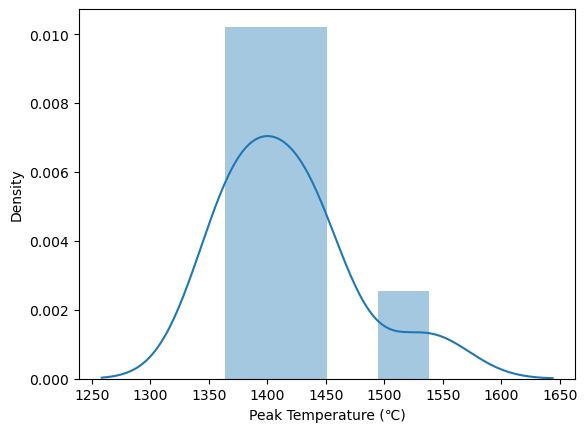

In [14]:
sns.distplot(data['Peak Temperature (℃)'], kde=True)

In [15]:
data['Peak Temperature (℃)'].skew()

1.4018327518996385

<Axes: xlabel='Peak Temperature reached Time (min)', ylabel='Density'>

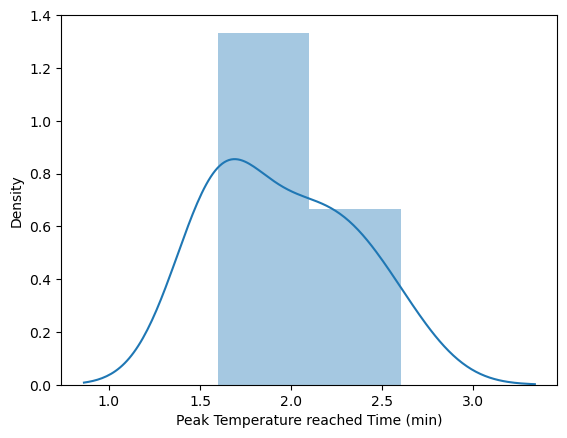

In [16]:
sns.distplot(data['Peak Temperature reached Time (min)'], kde=True)

In [17]:
data['Peak Temperature reached Time (min)'].skew()

0.49268958248219846

<Axes: xlabel='Scanning Distance (mm)', ylabel='Density'>

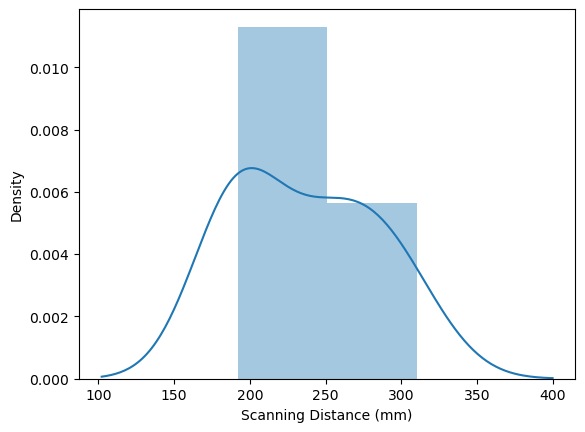

In [18]:
sns.distplot(data['Scanning Distance (mm)'], kde=True)

In [19]:
data['Scanning Distance (mm)'].skew()

0.34232105820008446

<Axes: xlabel='Equivalent stress (MPa)', ylabel='Density'>

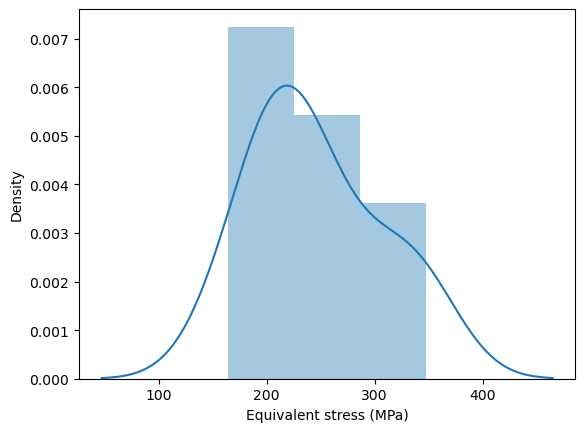

In [20]:
sns.distplot(data['Equivalent stress (MPa)'], kde=True)

In [21]:
data['Equivalent stress (MPa)'].skew()

0.6224136455315664

#Insights from histogram graph:
* Peak temperature and Equivalent stress are showing normal distribution.
* Peak temperature time and scanning distance are not normal/skewed.

#Insights from statistical values:
* Peak temperature is showing high skewness.
* Peak temperature time, scanning distance and Equivalent stress are showing modearate skewnwss.

<Axes: xlabel='Peak Temperature (℃)', ylabel='Equivalent stress (MPa)'>

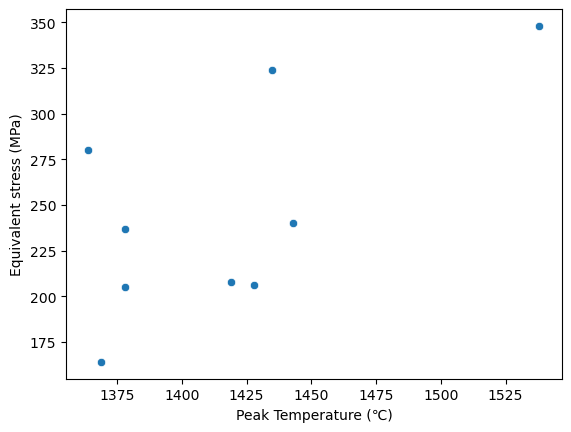

In [22]:
sns.scatterplot(data=data ,x='Peak Temperature (℃)', y='Equivalent stress (MPa)')

<Axes: xlabel='Peak Temperature reached Time (min)', ylabel='Equivalent stress (MPa)'>

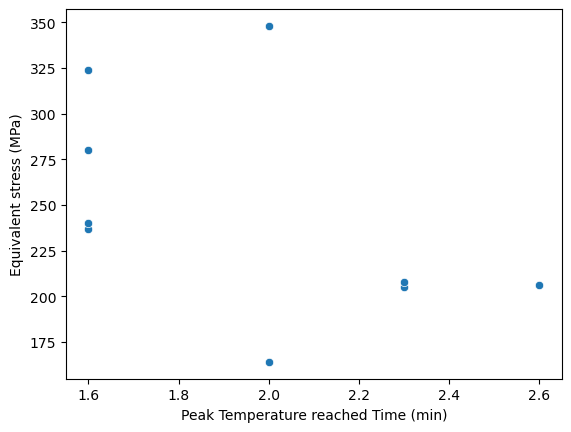

In [23]:
sns.scatterplot(data=data ,x='Peak Temperature reached Time (min)', y='Equivalent stress (MPa)')

<Axes: xlabel='Scanning Distance (mm)', ylabel='Equivalent stress (MPa)'>

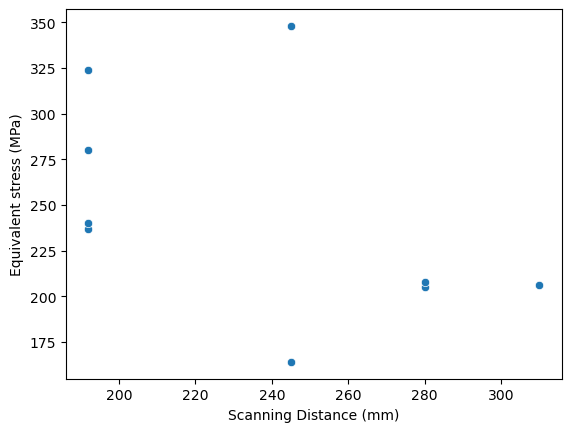

In [24]:
sns.scatterplot(data=data ,x='Scanning Distance (mm)', y='Equivalent stress (MPa)')

#Insights:
* Peak temperature showing reasonable positive linear relationship with stress.
* Peak temperature time showing reasonable negative linear relationship with stress.
* Scanning distance shows no relationship with stress

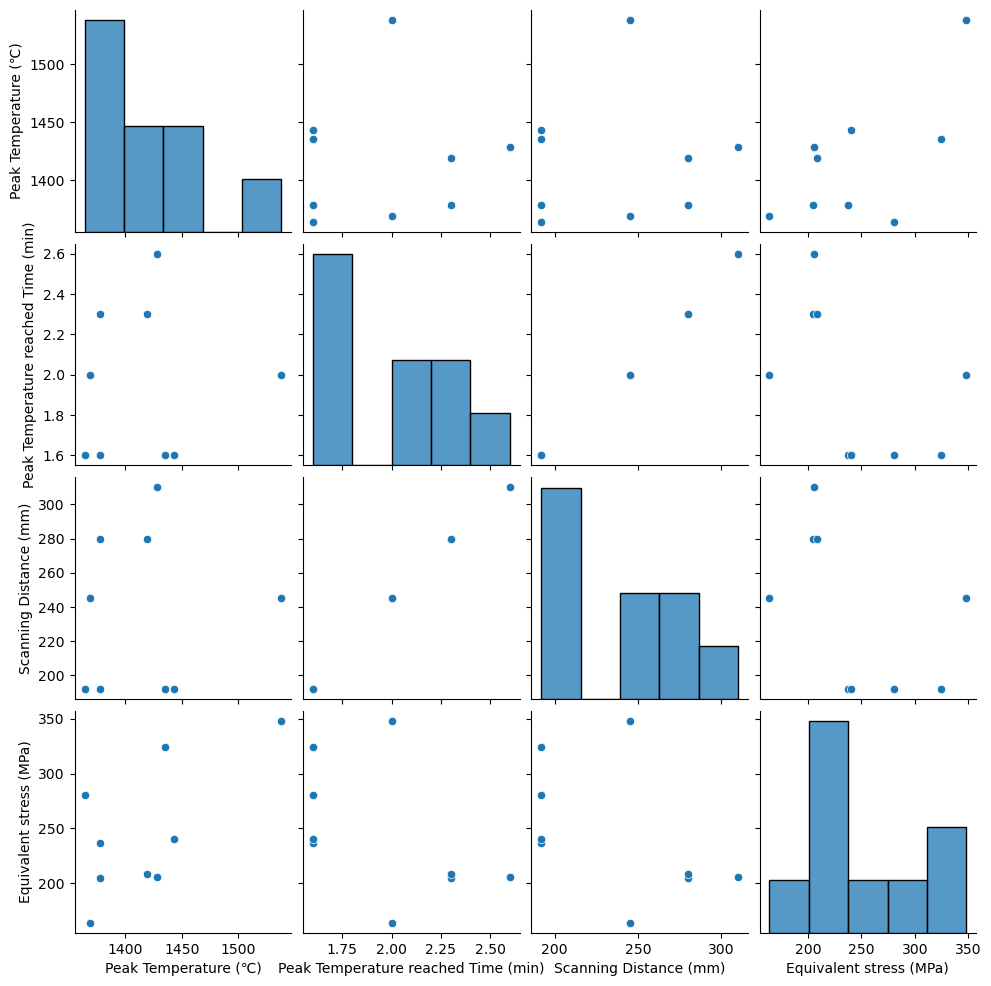

In [25]:
#sns.pairplot(data,hue ='Equivalent stress (MPa)')
sns.pairplot(data)

In [26]:
# check for duplicates:
data.duplicated().sum()

0

## Check for Outliers

<Axes: >

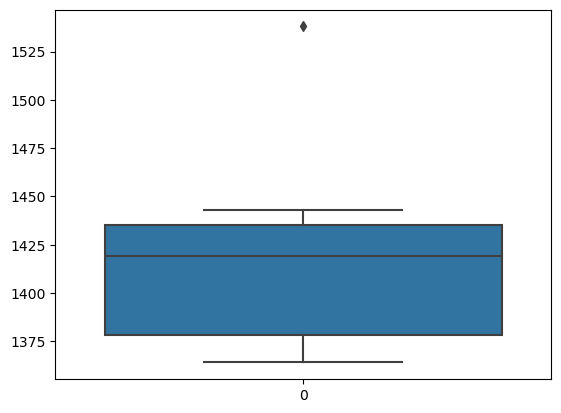

In [27]:
sns.boxplot(data['Peak Temperature (℃)'])

<Axes: >

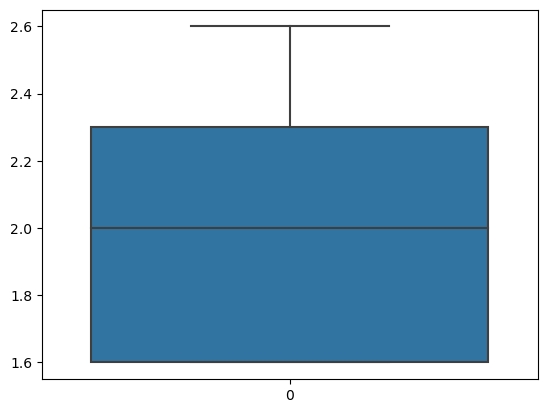

In [28]:
sns.boxplot(data['Peak Temperature reached Time (min)'])

<Axes: >

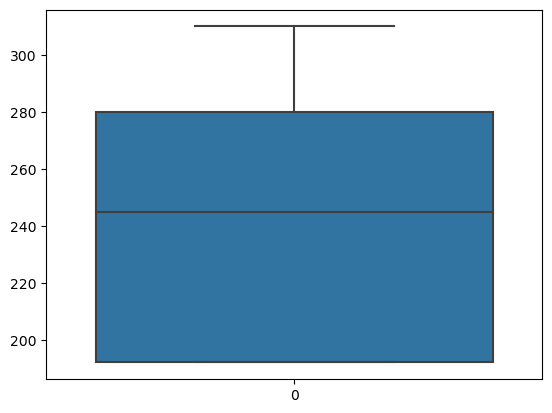

In [29]:
sns.boxplot(data['Scanning Distance (mm)'])

<Axes: >

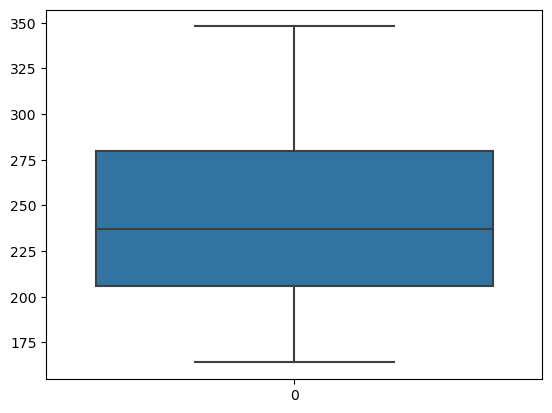

In [30]:
sns.boxplot(data['Equivalent stress (MPa)'])

<Axes: xlabel='Equivalent stress (MPa)'>

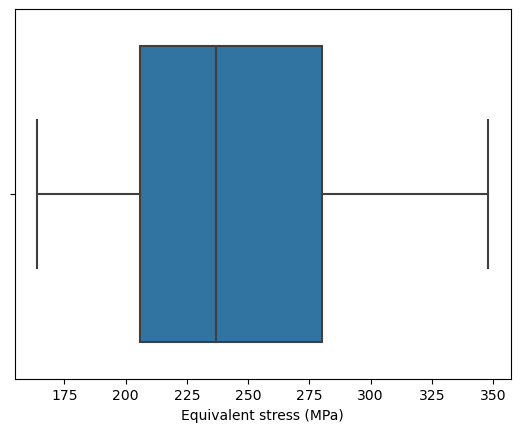

In [31]:
# Just changed the orientation of box plot:
sns.boxplot(data=data, x='Equivalent stress (MPa)', orient='horizontal')

In [32]:
#IQR method for non normal features:
Q1 = data['Peak Temperature (℃)'].quantile(0.25)
print('Lower quartile: \n',Q1)
Q3 = data['Peak Temperature (℃)'].quantile(0.75)
print('Upper quartile: \n',Q3)

Lower quartile: 
 1378.0
Upper quartile: 
 1435.0


In [33]:
IQR = Q3 -Q1
IQR

57.0

In [34]:
lower_limit = Q1 - 1.5*IQR
print('Lower limit:\n',lower_limit)
upper_limit = Q1 + 1.5*IQR
print('Upper limit:\n',upper_limit)

Lower limit:
 1292.5
Upper limit:
 1463.5


In [35]:
#find values of the oulier using filter
data.loc[data['Peak Temperature (℃)'] > upper_limit]

,Scan,Peak Temperature (℃),Peak Temperature reached Time (min),Scanning Distance (mm),Equivalent stress (MPa)
4,oi,1538,2.0,245,348


In [36]:
data.loc[data['Peak Temperature (℃)'] < lower_limit]

,Scan,Peak Temperature (℃),Peak Temperature reached Time (min),Scanning Distance (mm),Equivalent stress (MPa)


In [37]:
#Percentage of Outliers
len(data.loc[data['Peak Temperature (℃)'] > upper_limit]) / len(data) *100

11.11111111111111

Note:
* Here outliers is around 11 %, so no need to handle it.

## Feature engineering

In [38]:
data.corr()

,Peak Temperature (℃),Peak Temperature reached Time (min),Scanning Distance (mm),Equivalent stress (MPa)
Peak Temperature (℃),1.000000,0.087896,0.096257,0.649097
Peak Temperature reached Time (min),0.087896,1.000000,0.998422,-0.469954
Scanning Distance (mm),0.096257,0.998422,1.000000,-0.468769
Equivalent stress (MPa),0.649097,-0.469954,-0.468769,1.000000


<Axes: >

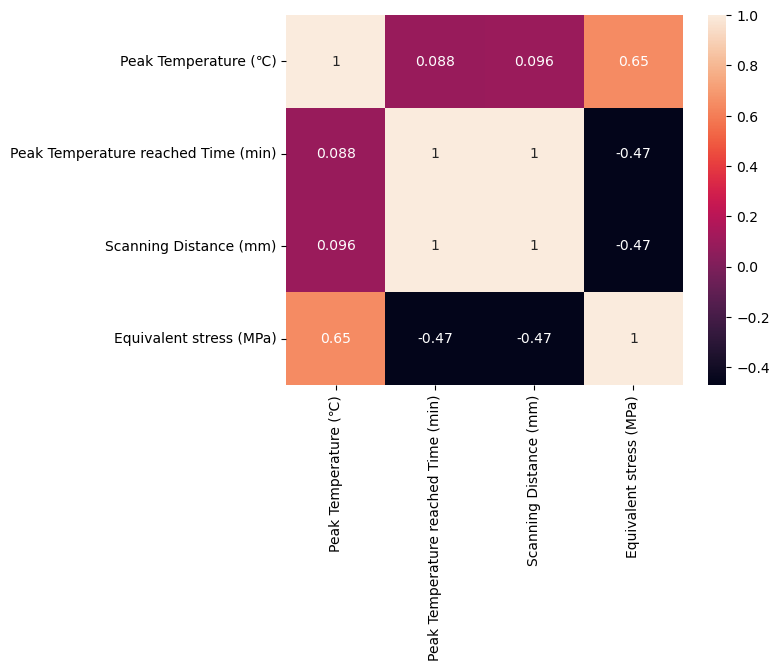

In [39]:
#Check correlation with input and target variables
sns.heatmap(data.corr(), annot= True)

Note:
* All input features has a reasonable correlation with target variable.

<Axes: >

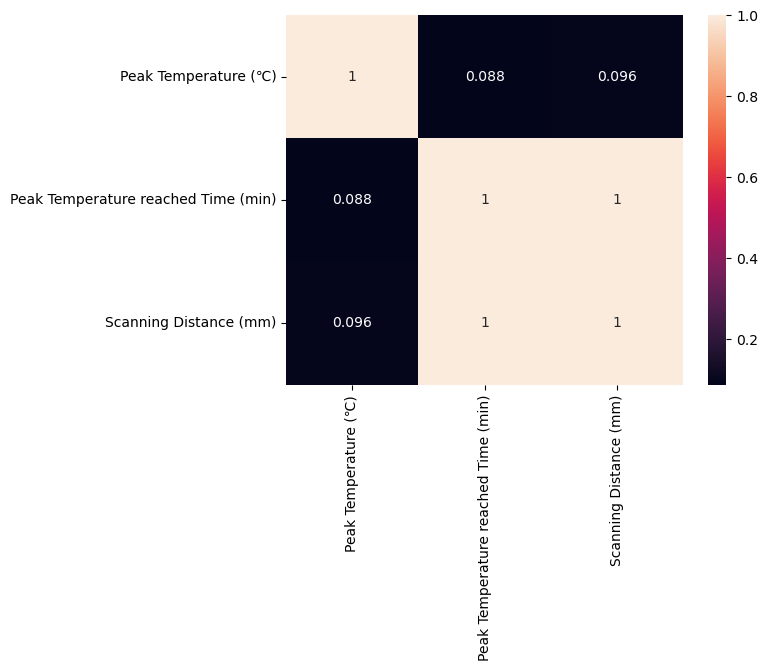

In [40]:
#check correlations between input variables
sns.heatmap(data.drop('Equivalent stress (MPa)', axis = 1).corr(), annot= True)

Note:
* Here the input variables has very less corelation with each other. Therefore no need to drop any feature.

## Split data into x and y

In [41]:
x = data.drop(labels=['Scan','Equivalent stress (MPa)'], axis = 1)
y = data['Equivalent stress (MPa)']

In [42]:
#from sklearn.model_selection import train_test_split

In [43]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 5)

In [44]:
#x_train.shape

In [45]:
#x_test.shape

In [46]:
x.shape

(9, 3)

In [47]:
x.columns

Index(['Peak Temperature (℃)', 'Peak Temperature reached Time (min)',
       'Scanning Distance (mm)'],
      dtype='object')

In [48]:
y.shape

(9,)

## Model building

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

In [51]:
#model.fit(x_train,y_train)
model.fit(x,y)

LinearRegression()

In [52]:
#y_pred = model.predict(x_test)
y_pred = model.predict(x)
y_pred

array([182.32343306, 214.53578185, 211.28749856, 197.12494855,
       329.90267895, 292.77642607, 247.99340457, 299.06176242,
       236.99406596])

In [53]:
model.coef_

array([  0.78566704, 196.66702175,  -2.31064644])

In [54]:
model.intercept_

-705.6789001017867

In [55]:
#make predictions

In [56]:
model.predict([[1378,2.3,280]])

array([182.32343306])

In [57]:
#Evaluate the prediction
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [58]:
#showing the difference between y and y_predicted values
data1 = {'y' : y, 'y_pred' : y_pred}
df = pd.DataFrame(data1)
df['Difference'] = df['y'] - df['y_pred']
#df['Absolute Difference'] = np.abs(df['y'] - df['y_pred'])
print(df)
print('----------------------------------------------------')
#acceptable_values = df['Absolute Difference'] - 10
#print('Acceptable values:\n', acceptable_values)
std_deviation = np.std(df['Difference'])
print('Standard deviation:',std_deviation)

     y      y_pred  Difference
0  205  182.323433   22.676567
1  208  214.535782   -6.535782
2  206  211.287499   -5.287499
3  164  197.124949  -33.124949
4  348  329.902679   18.097321
5  324  292.776426   31.223574
6  237  247.993405  -10.993405
7  240  299.061762  -59.061762
8  280  236.994066   43.005934
----------------------------------------------------
Standard deviation: 30.62904336151112


In [59]:
#MSE = mean_squared_error(y_test, y_pred)
MSE = mean_squared_error(y, y_pred)
MSE

938.1382972413282

In [60]:
#MAE = mean_absolute_error(y_test, y_pred)
MAE = mean_absolute_error(y, y_pred)
MAE

25.55631021309476

In [61]:
RMSE = np.sqrt(MSE)
RMSE

30.62904336151112

In [62]:
#r2_score(y_test, y_pred) 
r2score = r2_score(y, y_pred) 
r2score

0.7109423777738351

In [63]:
adj_r2 = 1 - ((1 - r2score) * (y.shape[0]-1)) / ((y.shape[0]-3-1))
adj_r2

0.5375078044381361

In [70]:
adj_r2 = 1 - ((1 - 71.09) * (y.shape[0]-1)) / ((y.shape[0]-3-1))
adj_r2

113.144

The model provided reasonable predictions for the equivalent/residual stress values. The fact that the adjusted R2 score is lower than the R2 score indicates that our model's predictions are satisfactory

In [64]:
import xgboost

In [65]:
from xgboost import XGBRegressor
xgb_r=XGBRegressor()

In [66]:
xgb_r.fit(x,y)
#xgb_r.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [67]:
y_hat=xgb_r.predict(x)
#y_hat=xgb_r.predict(x_test)

In [68]:
#r2score_xgb = r2_score(y_test, y_hat)
r2score_xgb = r2_score(y, y_hat) 
r2score_xgb

0.9999999996744148

# R2 Score plot for True and Predicted values

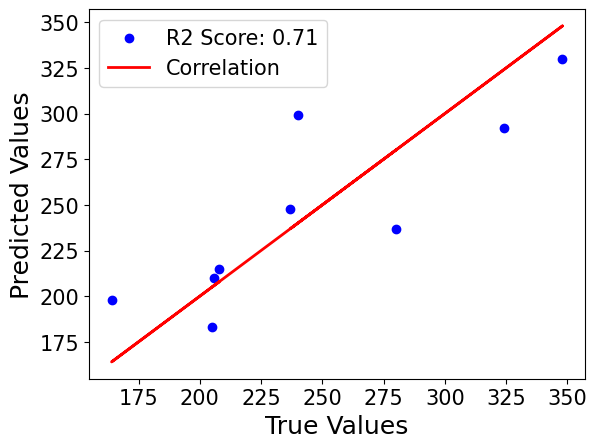

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Simulated true and predicted values for illustration
true_values = np.array([205, 208, 206, 164, 348, 324, 237, 240, 280])
predicted_values = np.array([183, 215, 210, 198, 330, 292, 248, 299, 237,])

# Calculate the R2 score
r2 = r2_score(true_values, predicted_values)

# Create a scatter plot of true values vs. predicted values
plt.scatter(true_values, predicted_values, color='blue', label=f'R2 Score: {r2:.2f}')

# Add a line for perfect correlation (true_values = predicted_values)
plt.plot(true_values, true_values, color='red', linestyle='-', linewidth=2, label='Correlation')

# Label the axes
plt.xlabel('True Values', fontsize=18)
plt.ylabel('Predicted Values', fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add a legend
plt.legend(fontsize=15)

# Show the plot
plt.show()


# Summary

The residual stress ML model shows reasonable prediction.